In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os
from tqdm import tqdm

In [3]:
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]], np.float32)
def pre_process(path, name, factor=1.3):
    """
    Preprocess image: RGB image --> Gray image --> Blur image (reduce noise) --> High Pass Filter (sharpen)         --> Constrast Limited Adaptive Histogram Equalization --> Exposure
    @INPUT:
        - path: image path
        - name: image name
        - factor: exposure factor
    @OUTPUT:
        - imgAHE: preprocessed image
    """

    img = cv2.imread(os.path.join(path, name))

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to gray image

    imgBlur = cv2.GaussianBlur(imgGray, (3,3), 0)   # reduce noise

    imgH = cv2.filter2D(imgBlur, -1, kernel)        # sharpen

    AHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))# Contrast Limited Adaptive Histogram Equalization 
    imgAHE = AHE.apply(imgH)
    imgAHE = np.array(imgAHE)

    img_processed = imgAHE*factor   # exposure

    return img_processed

In [4]:
# Training set datapath
train_path = '../data/train/'

# Get name of all image in training set
names = os.listdir(train_path)


100%|███████████████████████████████████████████████████████████████████████████| 33402/33402 [02:43<00:00, 204.26it/s]


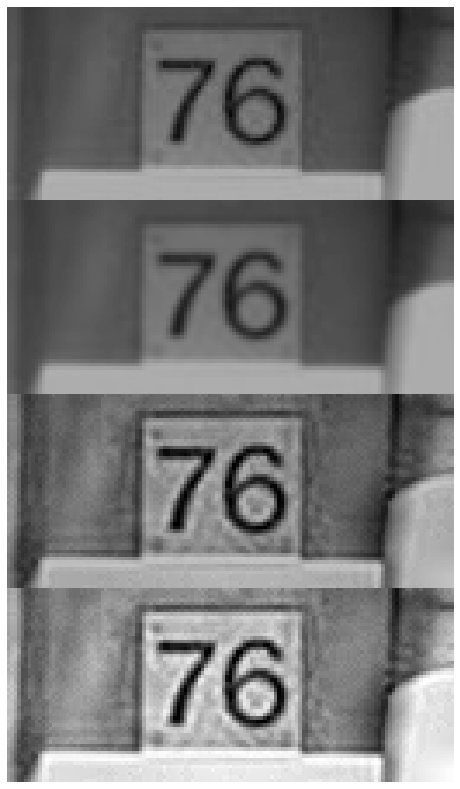

In [5]:
# DEMO

img = cv2.imread(os.path.join(train_path, '10120.png'))

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgBlur = cv2.GaussianBlur(imgGray, (3,3), 0)

imgH = cv2.filter2D(imgBlur,-1, kernel)

AHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imgAHE = AHE.apply(imgH)
imgAHE = np.array(imgAHE)

imgExp = imgAHE*1.3

imgShow = np.vstack([imgGray, imgBlur, imgAHE, imgExp])
plt.figure(figsize=(8,20))
plt.imshow(imgShow, cmap='gray')
plt.axis('off')
plt.show()